In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px

In [21]:
df = pd.read_csv("Mall_Customers.csv")

In [22]:
df.shape

(200, 5)

In [23]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [25]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

<Axes: xlabel='count', ylabel='Gender'>

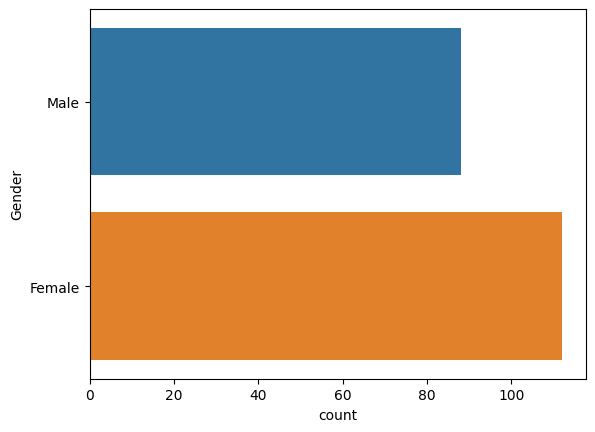

In [26]:
sns.countplot(y='Gender',data=df)

In [27]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


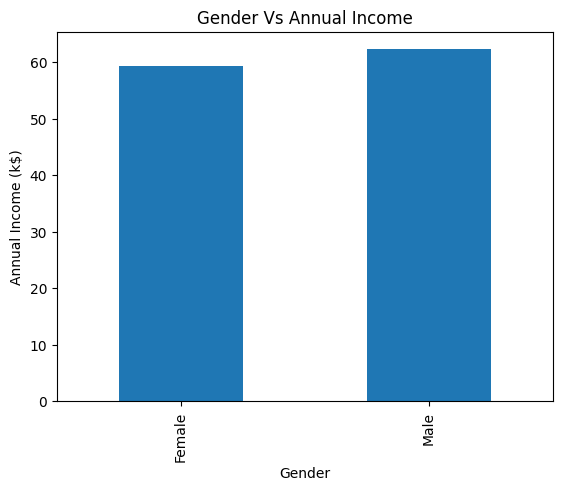

In [28]:
df.groupby('Gender')['Annual Income (k$)'].mean().plot.bar()
plt.title("Gender Vs Annual Income")
plt.ylabel("Annual Income (k$)")
plt.show()

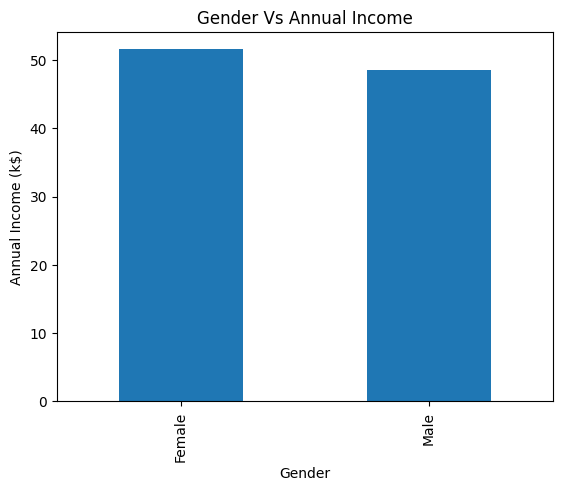

In [29]:
df.groupby('Gender')['Spending Score (1-100)'].mean().plot.bar()
plt.title("Gender Vs Annual Income")
plt.ylabel("Annual Income (k$)")
plt.show()

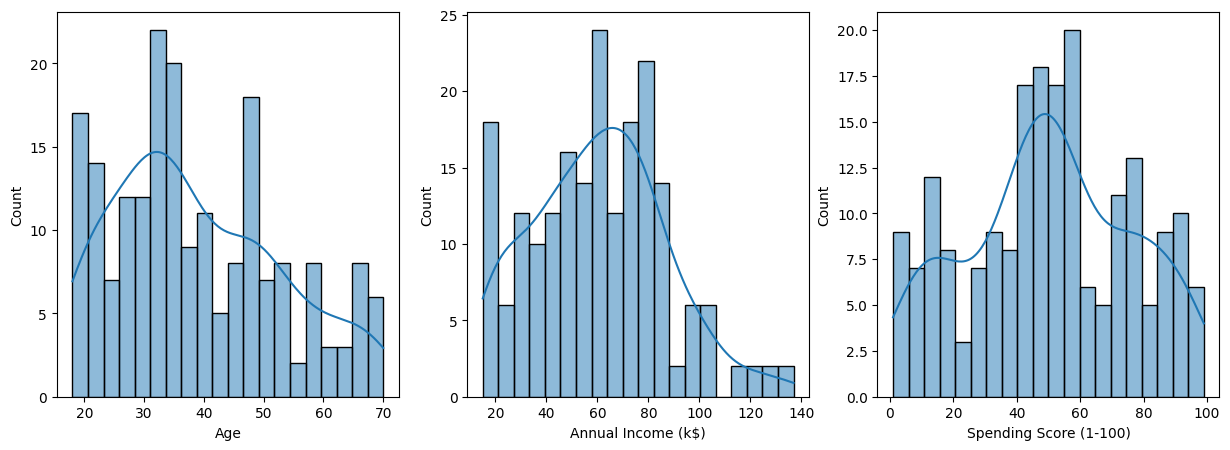

In [30]:
plt.figure(figsize=(15,5))
n = 0
for i in ["Age","Annual Income (k$)","Spending Score (1-100)"]:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.histplot(df[i],bins=20,kde=True)


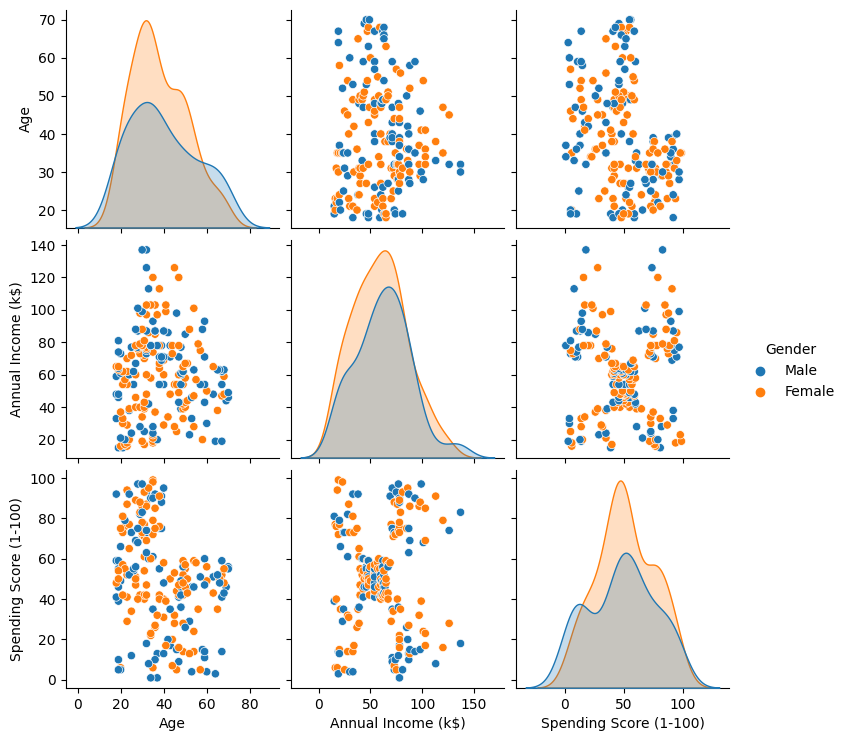

In [31]:
sns.pairplot(df.drop("CustomerID",axis = 1),hue="Gender")

In [32]:
model_data = df[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [33]:
res = []
for i  in range(1,11):
    km= KMeans(n_clusters = i,init='k-means++')
    km.fit(model_data)
    res.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [34]:
res

[308812.78,
 212840.1698209719,
 143342.751571706,
 104366.15145556197,
 75378.76464074483,
 58302.40630860368,
 51133.03138528138,
 44344.280380430384,
 40953.73845841784,
 37468.514093824444]

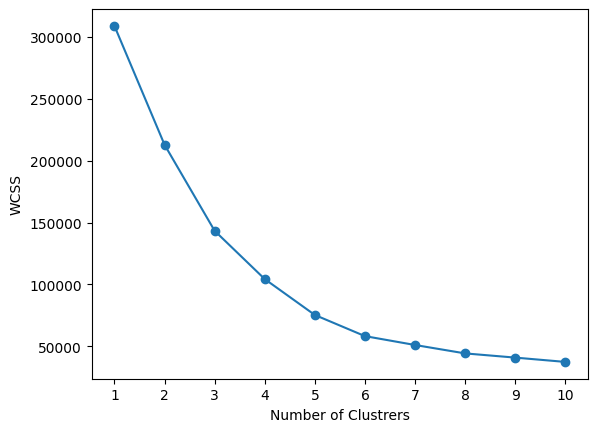

In [35]:
plt.plot(range(1,11),res,'o-')
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [36]:
kms = KMeans(n_clusters=6,init="k-means++")
kms.fit(model_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=6)

In [37]:
labels = kms.labels_
centroids = kms.cluster_centers_

data_with_labels = np.column_stack((model_data, labels))


df = pd.DataFrame(data_with_labels, columns=["Age","Annual Income (k$)","Spending Score (1-100)", 'Cluster'])


fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Cluster',
                    size_max=10, opacity=0.8, title='K-means Clustering')
fig.update_layout(scene=dict(aspectmode="cube"))
fig.show()